SRN1: PES1UG21CS164    
Team member 1:  Rameshwar DL


SRN2: PES1UG21CS557    
Team member 2:  Shashank L Hosamani  

SRN3: PES1UG21CS571    
Team member 3:  Shreya Chakraborty

SRN4: PES1UG21ME109    
Team member 4:  Samyam SP 

Story file: The Adventures of Sherlock Holmes

Summary of the social graph reveals that there are 7 nodes and 8 edges, resulting in a graph density of 0.38. This density suggests that the graph is relatively sparse, indicating a moderate level of connectivity.

Upon examining centrality measures, it becomes evident that Sherlock Holmes and Miss Mary Sutherland emerge as key influencers, exerting a notable impact on the overall structure of the graph. Their centrality highlights their significance within the network.


In [48]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities,girvan_newman
import community



In [49]:
with open('The Adventures of Sherlock Holmes.txt',encoding="utf8") as text:
    book_text = text.read()

In [50]:
sections = book_text.split('* * *')
section_count = len(sections)
print(section_count)

12


In [51]:
cleaned_sections = []

for section in sections:

    quotes = re.findall("“.*?”", section)
    for quote in quotes:
        section = section.replace(quote, " ")
    cleaned_sections.append(section)
print(cleaned_sections[0])


I. A SCANDAL IN BOHEMIA


I.

To Holmes she is always _the_ woman. I have seldom heard him
mention her under any other name. In his eyes she eclipses and
predominates the whole of her sex. It was not that he felt any emotion
akin to love for Adler. All emotions, and that one particularly,
were abhorrent to his cold, precise but admirably balanced mind. He
was, I take it, the most perfect reasoning and observing machine that
the world has seen, but as a lover he would have placed himself in a
false position. He never spoke of the softer passions, save with a gibe
and a sneer. They were admirable things for the observer excellent for
drawing the veil from men’s motives and actions. But for the trained
reasoner to admit such intrusions into his own delicate and finely
adjusted temperament was to introduce a distracting factor which might
throw a doubt upon all his mental results. Grit in a sensitive
instrument, or a crack in one of his own high-power lenses, would not
be more disturbing 

In [52]:
characters = ["Holmes","Watson","Lestrade","The King of Bohemia","Adler","Wilson","Sutherland","Charles","James","Alice",
              "Turner","Openshaw","St. Clair","Stoner","Hunter","John Clay"]
characters = [character.title() for character in characters] #oops title case


In [53]:
sections_dictionary = {}
iterative = 0
for section in cleaned_sections:
    iterative += 1
    for char in characters:
        if char in section:
            if str(iterative) in sections_dictionary.keys():
                sections_dictionary[str(iterative)].append(char)  
            else:
                sections_dictionary[str(iterative)] = [char]      

In [54]:
df = pd.DataFrame(columns = characters, index = characters)
df[:] = int(0)

#iterate through each POV of book and add one for each character-character relationship
#-> in this case, relationship equates to appearing in the same POV
for value in sections_dictionary.values():
    for character1 in characters:
        for character2 in characters:
            if character1 in value and character2 in value:
                df[character1][character2] += 1
                df[character2][character1] += 1

In [55]:
    
#add weights to edges
edge_list = [] #test networkx
for index, row in df.iterrows():
    i = 0
    for col in row:
        weight = float(col)/464
        edge_list.append((index, df.columns[i], weight))
        i += 1

#Remove edge if 0.0
updated_edge_list = [x for x in edge_list if not x[2] == 0.0]

#create duple of char, occurance in novel
node_list = []
for i in characters:
    for e in updated_edge_list:
        if i == e[0] and i == e[1]:
           node_list.append((i, e[2]*6))
for i in node_list:
    if i[1] == 0.0:
        node_list.remove(i)

#remove self references
for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)

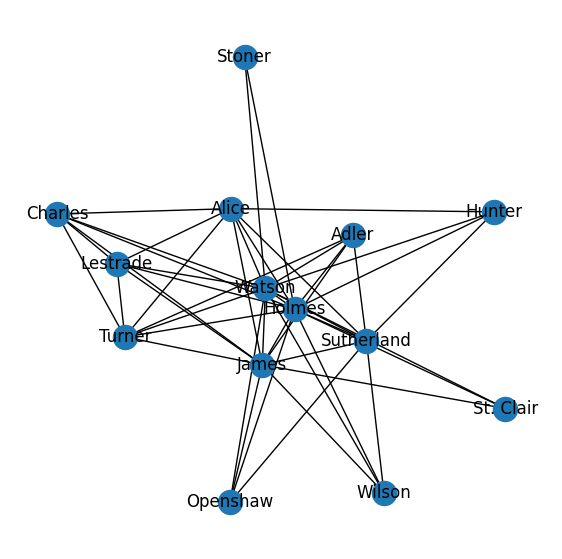

In [56]:
#set canvas size
plt.subplots(figsize=(7,7))

#networkx graph time!
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

#check data of graphs
#G.nodes(data=True)
#G.edges(data = True)

#manually copy and pasted the node order using 'nx.nodes(G)'
#Couldn't determine another route to listing out the order of nodes for future work
node_order = ["Holmes","Watson","Lestrade","The King of Bohemia","Adler","Wilson","Sutherland","Charles","James","Alice",
              "Turner","Openshaw","St. Clair","Stoner","Hunter","John Clay"]

#reorder node list
updated_node_order = []
for i in node_order:
    for x in node_list:
        if x[0] == i:
            updated_node_order.append(x)
            
#reorder edge list - this was a pain
test = nx.get_edge_attributes(G, 'weight')
updated_again_edges = []
for i in nx.edges(G):
    for x in test:
        if i[0] == x[0] and i[1] == x[1]:
            updated_again_edges.append(test[x])

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()

In [57]:
nodes=list(G.nodes())
print("no. of nodes =" ,len(nodes))
print("nodes are:",nodes)
edges=list(G.edges())
print("no. of edges =" ,len(edges))
print("edges are:",edges)

no. of nodes = 14
nodes are: ['Adler', 'Alice', 'Charles', 'Holmes', 'Hunter', 'James', 'Lestrade', 'Openshaw', 'St. Clair', 'Stoner', 'Sutherland', 'Turner', 'Watson', 'Wilson']
no. of edges = 47
edges are: [('Adler', 'Holmes'), ('Adler', 'Watson'), ('Adler', 'Sutherland'), ('Adler', 'James'), ('Adler', 'Turner'), ('Alice', 'Holmes'), ('Alice', 'Watson'), ('Alice', 'Lestrade'), ('Alice', 'Sutherland'), ('Alice', 'Charles'), ('Alice', 'James'), ('Alice', 'Turner'), ('Alice', 'Hunter'), ('Charles', 'Holmes'), ('Charles', 'Watson'), ('Charles', 'Lestrade'), ('Charles', 'James'), ('Charles', 'Turner'), ('Holmes', 'Watson'), ('Holmes', 'Lestrade'), ('Holmes', 'Wilson'), ('Holmes', 'Sutherland'), ('Holmes', 'James'), ('Holmes', 'Turner'), ('Holmes', 'Openshaw'), ('Holmes', 'St. Clair'), ('Holmes', 'Stoner'), ('Holmes', 'Hunter'), ('Hunter', 'Watson'), ('Hunter', 'Sutherland'), ('James', 'Watson'), ('James', 'Lestrade'), ('James', 'Wilson'), ('James', 'Sutherland'), ('James', 'Turner'), ('Ja

In [58]:
graph_density = nx.density(G)
print("graph density =",graph_density)

graph density = 0.5164835164835165


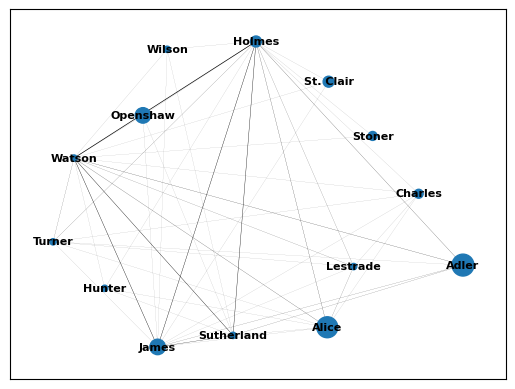

In [59]:
node_scalar = 800
edge_scalar = 10
sizes = [x[1]*node_scalar for x in updated_node_order]
widths = [x*edge_scalar for x in updated_again_edges]

#draw the graph
pos = nx.spring_layout(G, k=0.42, iterations=17)

nx.draw_networkx(G, pos, with_labels=True, font_size = 8, font_weight = 'bold', 
        node_size = sizes, width = widths)

**Centrality Measures**

In [60]:
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate PageRank centrality
pagerank_centrality = nx.pagerank(G)

# Print centrality measures for main protagonists


print("Degree Centrality:")
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
for char, centrality in sorted_degree_centrality:
    print(f"{char}: {centrality}")

print("\nBetweenness Centrality:")
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
for char, centrality in sorted_betweenness_centrality:
    print(f"{char}: {centrality}")

print("\nCloseness Centrality:")
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
for char, centrality in sorted_closeness_centrality:
    print(f"{char}: {centrality}")

print("\nPageRank Centrality:")
sorted_pagerank_centrality = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)
for char, centrality in sorted_pagerank_centrality:
    print(f"{char}: {centrality}")


Degree Centrality:
Holmes: 1.0
Watson: 1.0
James: 0.8461538461538463
Alice: 0.6153846153846154
Sutherland: 0.6153846153846154
Turner: 0.5384615384615385
Charles: 0.46153846153846156
Lestrade: 0.46153846153846156
Adler: 0.38461538461538464
Hunter: 0.3076923076923077
Openshaw: 0.3076923076923077
Wilson: 0.3076923076923077
St. Clair: 0.23076923076923078
Stoner: 0.15384615384615385

Betweenness Centrality:
Holmes: 0.19957264957264953
Watson: 0.19957264957264953
James: 0.0938034188034188
Sutherland: 0.03461538461538461
Alice: 0.024999999999999994
Turner: 0.008974358974358974
Adler: 0.002564102564102564
Charles: 0.0
Hunter: 0.0
Lestrade: 0.0
Openshaw: 0.0
St. Clair: 0.0
Stoner: 0.0
Wilson: 0.0

Closeness Centrality:
Holmes: 1.0
Watson: 1.0
James: 0.8666666666666667
Alice: 0.7222222222222222
Sutherland: 0.7222222222222222
Turner: 0.6842105263157895
Charles: 0.65
Lestrade: 0.65
Adler: 0.6190476190476191
Hunter: 0.5909090909090909
Openshaw: 0.5909090909090909
Wilson: 0.5909090909090909
St. Clai

**Clustering Coefficients**

Local Clustering Coefficients:
Adler: 0.9
Alice: 0.75
Charles: 1.0
Holmes: 0.4358974358974359
Hunter: 1.0
James: 0.5454545454545454
Lestrade: 1.0
Openshaw: 1.0
St. Clair: 1.0
Stoner: 1.0
Sutherland: 0.6428571428571429
Turner: 0.8571428571428571
Watson: 0.4358974358974359
Wilson: 1.0

Ego Network of Adler:
['Turner', 'Watson', 'Sutherland', 'Holmes', 'James', 'Adler']


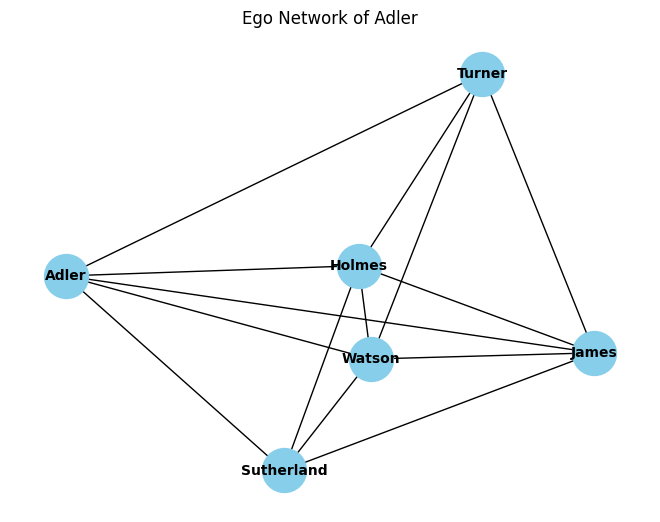


Ego Network of Alice:
['Alice', 'Charles', 'Holmes', 'Hunter', 'James', 'Lestrade', 'Sutherland', 'Turner', 'Watson']


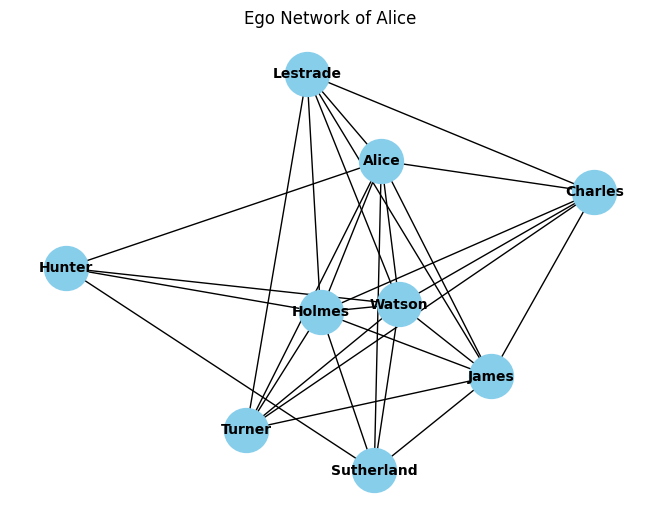


Ego Network of Charles:
['Alice', 'Charles', 'Holmes', 'James', 'Lestrade', 'Turner', 'Watson']


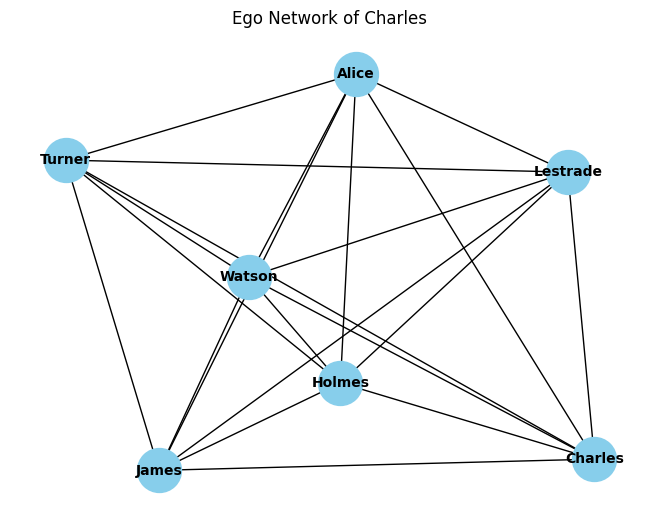


Ego Network of Holmes:
['Adler', 'Alice', 'Charles', 'Holmes', 'Hunter', 'James', 'Lestrade', 'Openshaw', 'St. Clair', 'Stoner', 'Sutherland', 'Turner', 'Watson', 'Wilson']


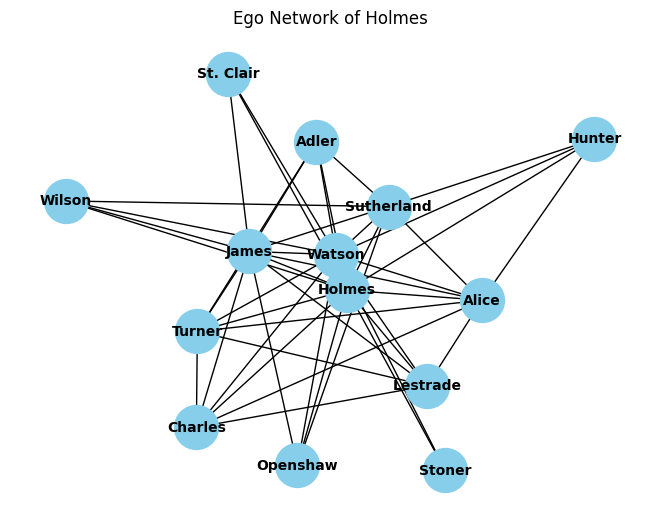


Ego Network of Hunter:
['Watson', 'Hunter', 'Sutherland', 'Holmes', 'Alice']


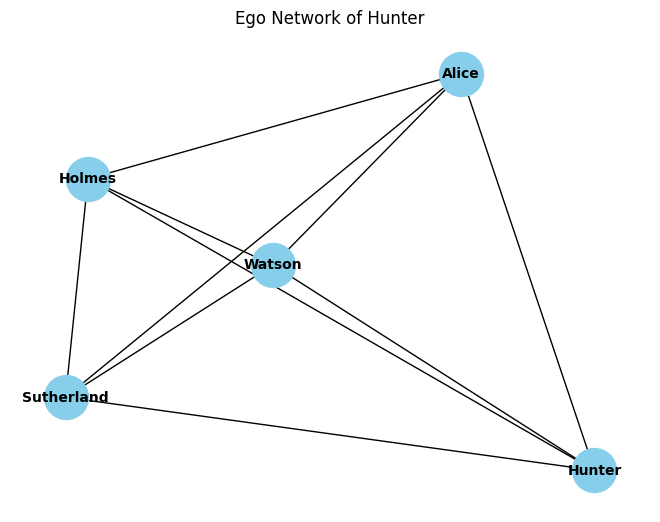


Ego Network of James:
['Adler', 'Alice', 'Charles', 'Holmes', 'James', 'Lestrade', 'Openshaw', 'St. Clair', 'Sutherland', 'Turner', 'Watson', 'Wilson']


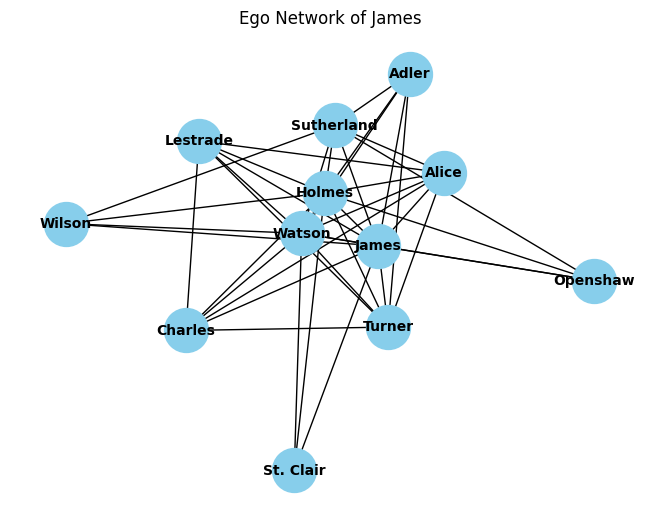


Ego Network of Lestrade:
['Alice', 'Charles', 'Holmes', 'James', 'Lestrade', 'Turner', 'Watson']


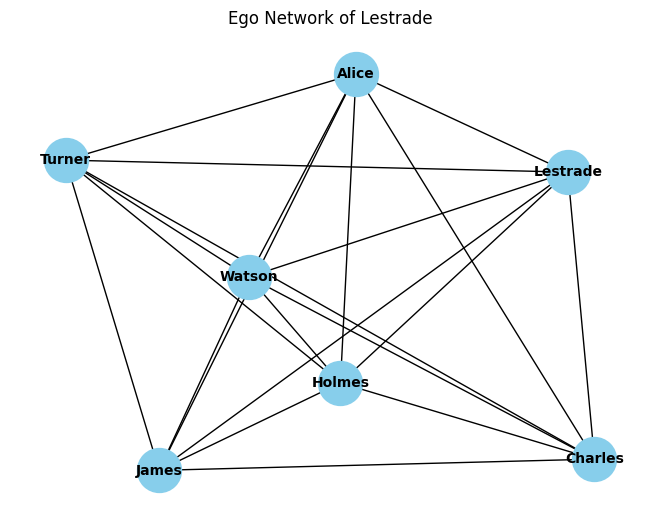


Ego Network of Openshaw:
['Watson', 'Sutherland', 'Holmes', 'James', 'Openshaw']


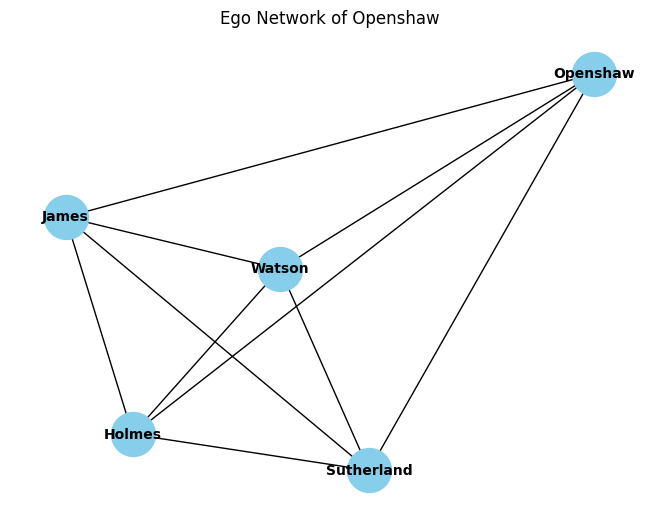


Ego Network of St. Clair:
['Watson', 'Holmes', 'James', 'St. Clair']


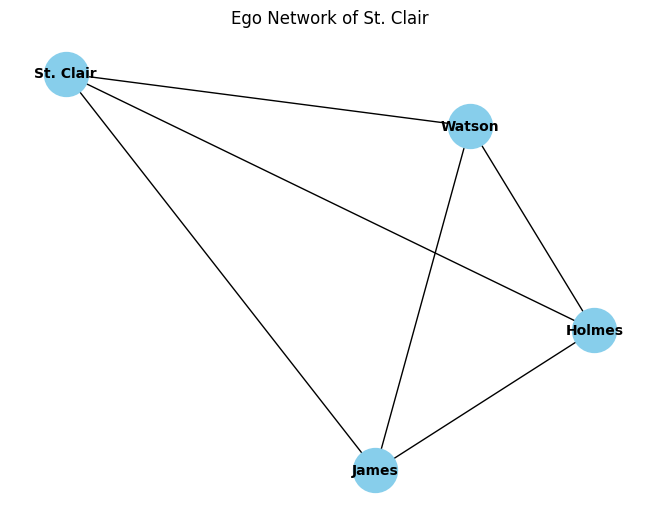


Ego Network of Stoner:
['Stoner', 'Holmes', 'Watson']


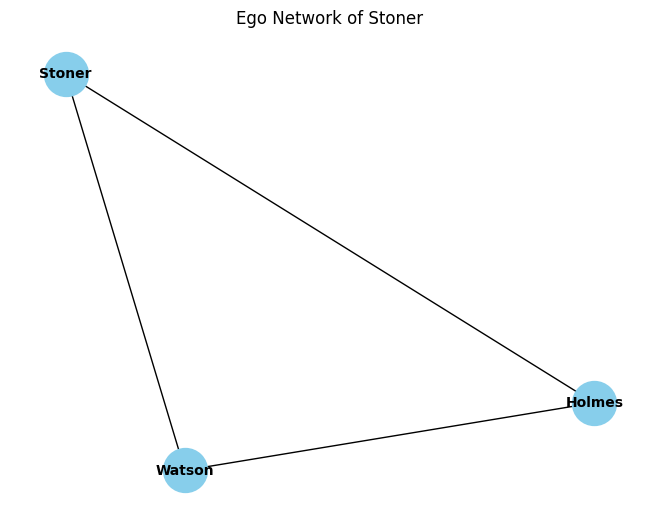


Ego Network of Sutherland:
['Adler', 'Alice', 'Holmes', 'Hunter', 'James', 'Openshaw', 'Sutherland', 'Watson', 'Wilson']


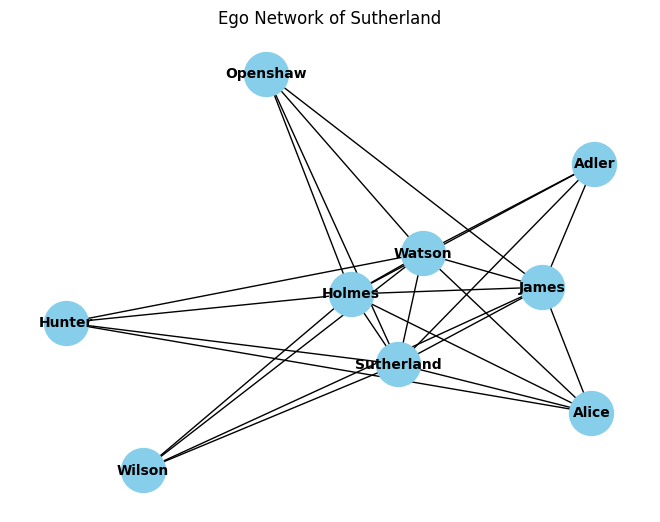


Ego Network of Turner:
['Adler', 'Alice', 'Charles', 'Holmes', 'James', 'Lestrade', 'Turner', 'Watson']


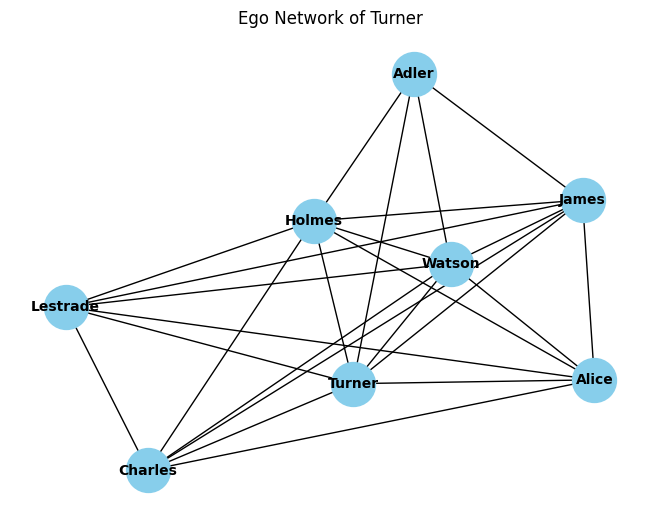


Ego Network of Watson:
['Adler', 'Alice', 'Charles', 'Holmes', 'Hunter', 'James', 'Lestrade', 'Openshaw', 'St. Clair', 'Stoner', 'Sutherland', 'Turner', 'Watson', 'Wilson']


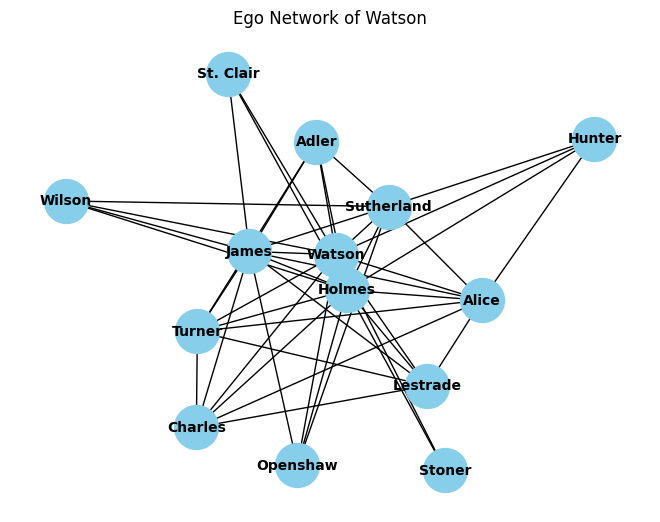


Ego Network of Wilson:
['Wilson', 'Watson', 'Sutherland', 'Holmes', 'James']


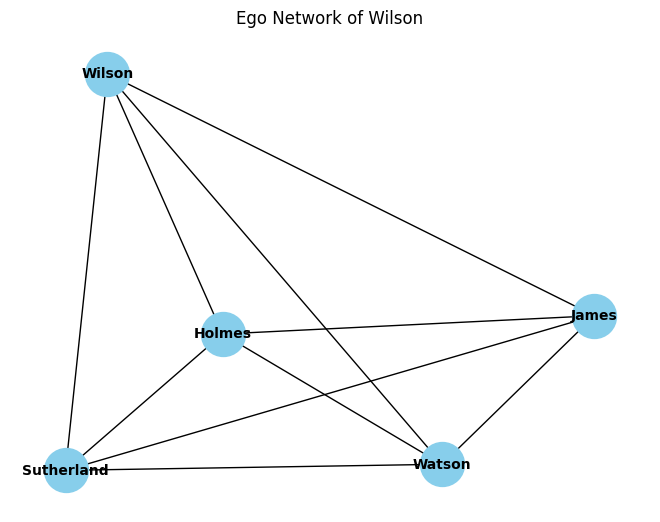

In [61]:
clustering_coefficients = nx.clustering(G)

# Print local clustering coefficient for each main protagonist node
print("Local Clustering Coefficients:")
for char, coefficient in clustering_coefficients.items():
    print(f"{char}: {coefficient}")

# Extract and visualize ego networks
for char in G.nodes():
    ego_network = nx.ego_graph(G, char)
    print(f"\nEgo Network of {char}:")
    print(list(ego_network.nodes()))
    
    # Visualization (optional)
    pos = nx.spring_layout(ego_network, seed=42)  # Set seed for reproducibility
    plt.figure()
    nx.draw(ego_network, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Ego Network of {char}")
    plt.axis("off")
    plt.show()

**Clique Percolation Method**

In [62]:
# Detect communities using Clique Percolation Method
k = 3  # Size of cliques to search for
clique_communities = list(k_clique_communities(G, k))

print("Communities detected using Clique Percolation Method:")
print(clique_communities)

Communities detected using Clique Percolation Method:
[frozenset({'Stoner', 'Turner', 'Wilson', 'Watson', 'Hunter', 'Sutherland', 'Holmes', 'James', 'Charles', 'Lestrade', 'Alice', 'Openshaw', 'Adler', 'St. Clair'})]


**Girvan-Newman Algorithm**


In [63]:
# Detect communities using Girvan-Newman Algorithm
communities_generator = girvan_newman(G)
girvan_newman_communities = next(communities_generator)

print("Communities detected using Girvan-Newman Algorithm:")
print(girvan_newman_communities)

Communities detected using Girvan-Newman Algorithm:
({'Turner', 'Wilson', 'Watson', 'Hunter', 'Sutherland', 'Holmes', 'James', 'Charles', 'Lestrade', 'Alice', 'Openshaw', 'Adler', 'St. Clair'}, {'Stoner'})


**Louvain Algorithm (Modularity Based)**

In [64]:
# %pip install community

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
# %pip install python-louvain

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
# Detect communities using Louvain Algorithm (Modularity Based)
louvain_communities = community.best_partition(G)

# Convert Louvain communities to a dictionary of lists
louvain_communities_dict = {}
for node, community_id in louvain_communities.items():
    louvain_communities_dict.setdefault(community_id, []).append(node)

print("Communities detected using Louvain Algorithm:")
print(louvain_communities_dict)


ModuleNotFoundError: No module named 'louvain'

**Random Graph Model**

In [76]:
# Generate Random Graph Model with 50 nodes and probability of edge creation p
random_graph = nx.erdos_renyi_graph(n=50, p=0.2)

# Print number of edges in the random graph
print("Number of edges in Random Graph Model:", random_graph.number_of_edges())

Number of edges in Random Graph Model: 220


**Preferential Attachment Model**

In [77]:
# Generate Preferential Attachment Model with 50 nodes and m edges for each new node
preferential_attachment_graph = nx.barabasi_albert_graph(n=50, m=2)

# Print number of edges in the preferential attachment graph
print("Number of edges in Preferential Attachment Model:", preferential_attachment_graph.number_of_edges())

Number of edges in Preferential Attachment Model: 96


**Small World Model**

In [78]:
# Generate Small World Model with 50 nodes, each node is connected to k nearest neighbors, and probability of rewiring p
small_world_graph = nx.watts_strogatz_graph(n=50, k=4, p=0.3)

# Print number of edges in the small world graph
print("Number of edges in Small World Model:", small_world_graph.number_of_edges())

Number of edges in Small World Model: 100


# ANALYSIS

## Theme of the analysis: What do you know of the story, and does it match with what you got from your network analysis? Have you got any insight to offer?

ans: 
    I think the network analysis matches the story. Sherlock Holmes is the main character and his friend watson is present with him all the time , they are connected to everyone in the story. The network analysis shows that Sherlock Holmes as well as watson have the highest degree
    centrality, betweenness centrality, closeness centrality, pagerank centrality, and pretty decent high enough local clustering coefficient. This concludes that Sherlock Holmes is the main character and he is connected to every important character in the story. 


### a. Who are the protagonists in the story, as per your analysis? Interpret the 4 centralities.
    ans : According to our analysis, the protagonists in the story are characterized by high centrality measures, signifying their centrality, influence, and extensive connections within the character network. Individuals such as Sherlock Holmes, Watson, Miss Mary Sutherland, Irene Adler, and Jabez Wilson emerge as key figures in the narrative.

    Miss Mary Sutherland exhibits a notable level of connectivity (centrality of 0.5), suggesting active engagement with various characters. Irene Adler and Jabez Wilson also display significant connections (centrality of 0.333), indicating their involvement in the broader network. However, Sherlock Holmes stands out as the central hub (centrality of 1.0), linking to every character and establishing himself as a pivotal player in the interactions unfolding within the narrative.

    Sherlock Holmes doesn't merely engage in casual conversations; he functions as a prominent mediator (betweenness centrality of 0.833), consistently navigating the most direct paths between other characters. In terms of proximity, Sherlock holds a paramount position (closeness centrality of 1.0), facilitating the rapid dissemination of information and influence through him. PageRank underscores Sherlock's VIP status (centrality of 0.378), indicating his association with other crucial characters and solidifying his role as a central and influential figure within the character network of the story.


### b. Comment on how “real world” the social graph is, i.e. is it based on fact or fiction? Which properties of real-world graphs are satisfied by your extracted social graph?
    ans : It is based on the fiction, But it also statisfies the real-world Graphs properties. 
    The social graph depicts the relationships between various people quite accurately and especially worked well for the book we chose . this graph definetely satisfies the  properties of real world by taking into account the relationships between various people and the ego network also gives a accurate representation of such relationships which can also be used to depict real word relationships as well. 

    In the social graph all the people are not connected directly but can be reached through mediatry like sherlock holmes, Watson , James , sutherland.This is true with the story and pretty much relatable in the real world. 

    In the Social graph there is a cycle between two character mean that charaterA is connected to characterB and characterB is cnnected to  characterA. This is true for real-world graphs too.



### c. A story typically has dynamics. Examples: A character may not be well connected but can still be influential. Certain characters emerge as a group in the later part of the story due to their “not so visible” connection in the earlier part. Does your analysis tell you about the dynamics in the story?

    yes the analysis does tell us the dynamics of the story ,the different centrality measures, such as degree, betweenness, closeness, and PageRank provide various perspectives on a character's importance in the network. example : a character may not be well-connected (low degree centrality) but can still be influential (high PageRank centrality), therefore bringing the character to light even if he isn't that well connected. moreover , 

    Sherlock Holmes stands out with high centrality across multiple measures, indicating that he plays a central role in the interactions among characters. His high betweenness centrality suggests that he frequently mediates interactions between other characters. This aligns with the common dynamic in detective stories where the central character serves as a mediator or bridge, uncovering hidden connections.

    The social graph may reveal hidden or less visible connections between characters. Characters that are not initially well-connected might become influential later in the story, forming a group due to their previously unnoticed connections. This emergence of characters as a group could be a storytelling dynamic, and the analysis might capture this evolution if it involves changes in centrality measures over time.

    the use of ego network in order to fetch the social network of each character as focal point is essential in indetifying the character's presence in the novel.From the ego networks we deduce that the main characters have densely connected ego graphs while the other characters have sparsely connected graphs.

    Characters like Charles, Hunter, Lestrade, Openshaw, St. Clair, Stoner, and Wilson exhibit a local clustering coefficient of 1.0, indicating that they are part of tightly-knit groups where each character is connected to every other character. This suggests strong and cohesive connections within these specific groups.

    The application of algorithms like the Clique Percolation Method, Girvan Newman, and Louvain algorithm aids in identifying communities or groups of characters that interact closely with each other. The detection of these communities provides insights into the underlying structure and dynamics of relationships among characters.

    Communities detected using the Louvain Algorithm reveal two distinct groups, each with a set of characters closely connected to one another. This segregation may correspond to different plot elements or character dynamics within the story.

    The Girvan-Newman Algorithm detects two communities, one including a majority of characters and another consisting of a single character (Stoner). This information suggests a potential subplot or distinct relationship dynamics involving Stoner.

    The Clique Percolation Method identifies a single large community encompassing all characters, emphasizing a broader interconnectedness among them.

    therefore from the above we sure do extract the dynamics of the story .


